In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d

%matplotlib inline

In [117]:
def K(beta):
    integral_value = quad(
        (lambda epsilon : ((1-epsilon**2)*(1-beta*epsilon**2))**(-1./2.)),
        0,
        1
    )
    return integral_value[0]

In [119]:
def get_t(alpha,mu_to_gamma,alpha_f):
    
    COMPLICATED_INTEGRAL = quad(
                        (lambda beta : (beta*((1+beta)**(1./2.))*K(beta))**-1),
                            alpha**2,
                            0.99
                        )[0]
    
    PREFACTOR = np.pi / 4. * alpha_f * mu_to_gamma
    
    return PREFACTOR * COMPLICATED_INTEGRAL

In [121]:
def get_trajectory(alpha, mu_to_gamma, alpha_f, t = 1.):

    alpha_range = np.linspace(0.001,0.99,100)

    t_range = [get_t(i,mu_to_gamma,alpha_f) for i in alpha_range]
    
    t_to_alpha = interp1d(t_range,alpha_range)
    
    y = []

    for t_val in t:
        alpha = t_to_alpha(t_val)
        y_val = alpha_f * (1-alpha)*(1+alpha**2)**-0.5

        y.append(np.copy(y_val))
        
    return y

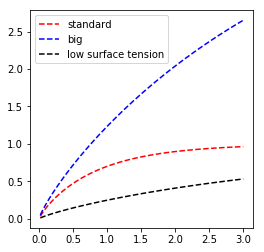

In [129]:
f,ax = plt.subplots(1,1,figsize = (4,4))

t = np.linspace(0.015,3,100)
y_val = get_trajectory(alpha, 1, 1, t = t)

ax.plot(t,y_val,'r--',label = 'standard')

y_val = get_trajectory(alpha, 1, 5, t = t)
ax.plot(t,y_val,'b--',label = 'big')

y_val = get_trajectory(alpha, 5, 1, t = t)
ax.plot(t,y_val,'k--',label = 'low surface tension')

plt.legend()